<a href="https://colab.research.google.com/github/Isabell-Gao/ALP24-CS/blob/main/ALP24_Day_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Project 2
Here will use Liner Rigression as our model to analyse housing data.


In [3]:
# import a lot of libraries

# pandas and numpy are similar but numpy includes more mathematics
import pandas as pd # specifically for data analysis
import numpy as np # silimar to pandas but borader
import matplotlib.pyplot as plt # plotting points/ visualizing data
import seaborn as sns # dedicated to statistical visualization/ plots look better
import scipy.stats as stats
import statsmodels.api as sm


#For fun you could try doing Linear Regression by yourself
#we will just go ahead and use the function.

from sklearn.linear_model import LinearRegression #Linear Regression model
from sklearn.model_selection import train_test_split #help seperate data into training, and other as real values

In [4]:
file_path = "/content/housing.csv"

data = pd.read_csv(file_path)

In [5]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [6]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

#Missing Data Analysis (Cleaning data)

In [9]:
#Check for missing values
missing_data = data.isnull().sum() # Find where are empty data cells #.sum = add them together

#Calculate the percentage of missing data in each column
missing_percentage = (missing_data / len(data)) * 100

#Display the missing data statistcs
print("Missing Values in Each Column:\n", missing_data)
print("\nPercentage of Missing Data:\n", missing_percentage)


Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [10]:
# Remove the rows with missing values
data_cleaned1 = data.dropna()

#Verify that this works

print("Missing Values in Each Column after removal:\n")
print(data_cleaned1.isnull().sum)


Missing Values in Each Column after removal:

<bound method NDFrame._add_numeric_operations.<locals>.sum of        longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False               False        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     Fa

# Data Exploration and Visualization

In [11]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


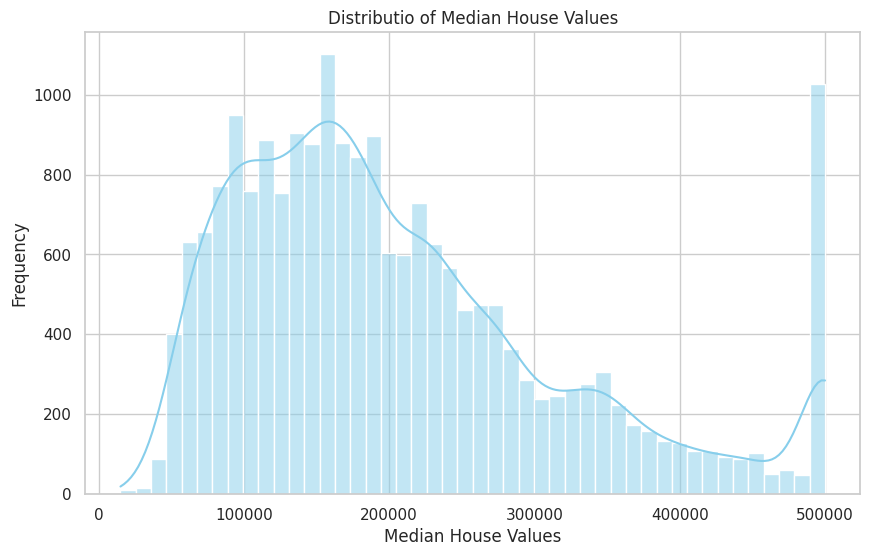

In [12]:
#We are creating a graph/plot of the median house value
sns.set(style="whitegrid")
plt.figure(figsize=(10,6))
sns.histplot(data_cleaned1['median_house_value'], color='skyblue', kde=True)

plt.title('Distributio of Median House Values')
plt.xlabel('Median House Values')
plt.ylabel('Frequency')

plt.show()

# Using Interquartile Range (Quantile function) to Remove Outliers

In [13]:
#Assuming 'data' is your DataFrame and 'median_house_value' is the column of interest.
Q1 = data_cleaned1['median_house_value'].quantile(0.25)
print(Q1)

Q3 = data_cleaned1['median_house_value'].quantile(0.75)
print(Q3)

IQR = Q3 - Q1
print(IQR)

119500.0
264700.0
145200.0


In [14]:
#Define the bounds for the outliers

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

#Remove outliers
data_no_outliers_1 = data_cleaned1[(data_cleaned1['median_house_value'] >= lower_bound) & (data_cleaned1['median_house_value'] <= upper_bound)]

#Check the shape of the data before and after removal of outliers
print("Shape before removing outliers:", data_cleaned1.shape)
print("Shape after removing outliers:", data_no_outliers_1.shape)





Shape before removing outliers: (20433, 10)
Shape after removing outliers: (19369, 10)


#BoxPlot for outliers Detection

##Outliers in Median Income


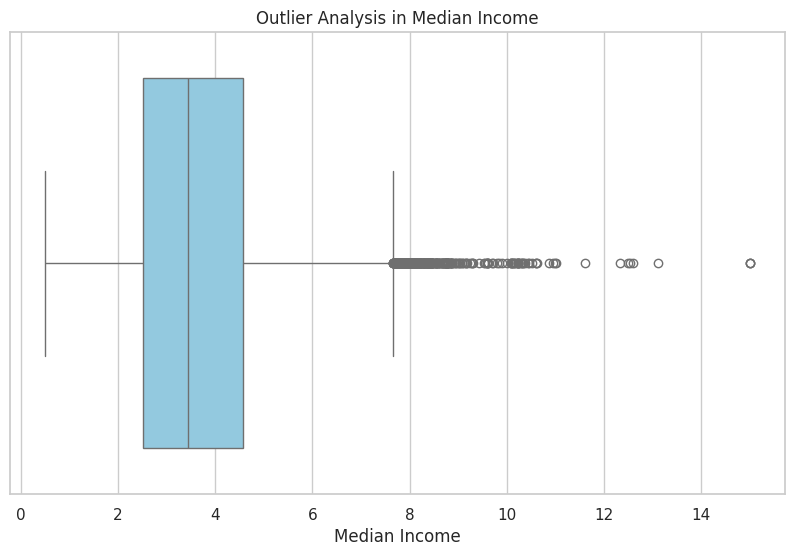

In [15]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_no_outliers_1['median_income'], color = 'skyblue')
plt.title("Outlier Analysis in Median Income")
plt.xlabel("Median Income")
plt.show()

In [16]:
# Calculate Q1 and Q3
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

# Check the shape of the data before and after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)


Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


In [17]:
#Select only new columns
numeric_data = data_no_outliers_2.select_dtypes(include=[np.number])
data_cleaned2 = numeric_data

#Correlation HeatMap

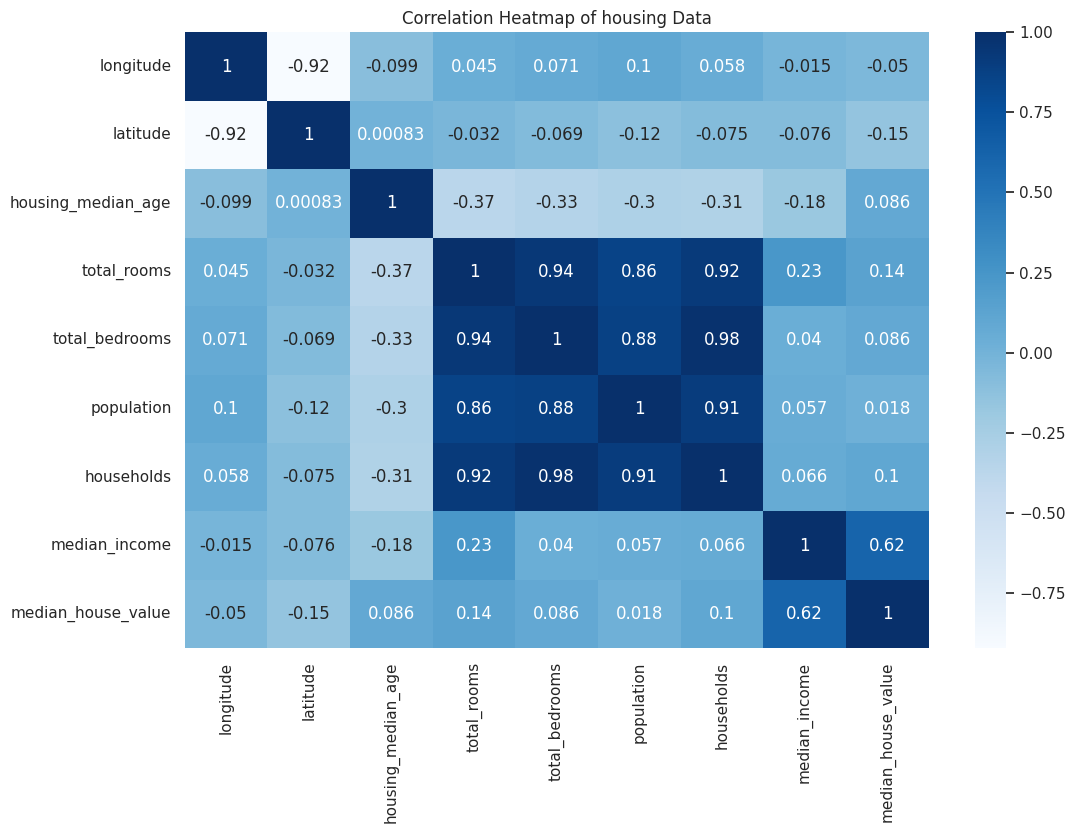

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(data_cleaned2.corr(), annot=True, cmap='Blues')
plt.title('Correlation Heatmap of housing Data')
plt.show()

Why do we drop total bedrooms?

We drop it because it had a high correlation with households and total_rooms and give us no new information fr trainning the model.

In [19]:
data_cleaned2 = data.drop("total_bedrooms", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [20]:
data_cleaned2.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [21]:
#Unique values in Ocean Proximity
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [22]:
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= lower_bound) & (data_no_outliers_1['median_income'] <= upper_bound)]

data = data_no_outliers_2
data = data.drop("total_bedrooms", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [23]:
for column in['ocean_proximity']:
  print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


We will use a method called dummy vatiahles which is helpful un Linear Regression.

#String Data Categorization to Dummy Variables

In [24]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity').astype(int)
data = pd.concat([data.drop("ocean_proximity", axis =1), ocean_proximity_dummies], axis = 1)
ocean_proximity_dummies

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [25]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,0,1,0


In [26]:
data = data.drop("ocean_proximity_ISLAND", axis=1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

#Splitting the Data into Train and Test

In [27]:
#Define our features(independt variables) and target(dependent variable)
features= ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']

target = ['median_house_value']

X = data[features]
y = data[target]

#Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=777)

#check the size of the splits
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')


Training set size: 15220 samples
Test set size: 3806 samples


In [28]:
#X_test

In [29]:
#X_train

In [30]:
#Add a constant.  To understand this you need

X_train_const = sm.add_constant(X_train)
X_train_const

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2945,1.0,-118.98,35.35,21.0,496.0,511.0,124.0,1.7614,0,1,0,0
15435,1.0,-117.23,33.21,21.0,1934.0,861.0,381.0,3.6181,1,0,0,0
18926,1.0,-122.17,38.08,7.0,18392.0,8276.0,2742.0,6.4232,0,0,1,0
11777,1.0,-121.27,38.75,43.0,1292.0,647.0,249.0,2.7188,0,1,0,0
2683,1.0,-115.54,32.99,17.0,1697.0,911.0,254.0,4.3523,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
11863,1.0,-121.24,40.31,36.0,1597.0,632.0,262.0,3.5962,0,1,0,0
4216,1.0,-118.27,34.11,36.0,1832.0,934.0,486.0,3.0521,1,0,0,0
8296,1.0,-118.14,33.76,52.0,2677.0,1144.0,624.0,4.3889,0,0,0,1
17301,1.0,-119.51,34.39,32.0,1921.0,951.0,334.0,3.2330,0,0,0,1


In [31]:
model_fitted = sm.OLS(y_train, X_train_const).fit() #Fits the model to the data

In [32]:
#print Summary
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.591
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     1997.
Date:                Mon, 08 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:35:52   Log-Likelihood:            -1.8887e+05
No. Observations:               15220   AIC:                         3.778e+05
Df Residuals:                   15208   BIC:                         3.778e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

#Predicting and Testing

In [33]:
#
X_test_const = sm.add_constant(X_test)
X_test
#Make those predictions
test_predictions = model_fitted.predict(X_test_const)
#test_predictions

#Checking OLS Assumptions

##Assumption 1: Linearity

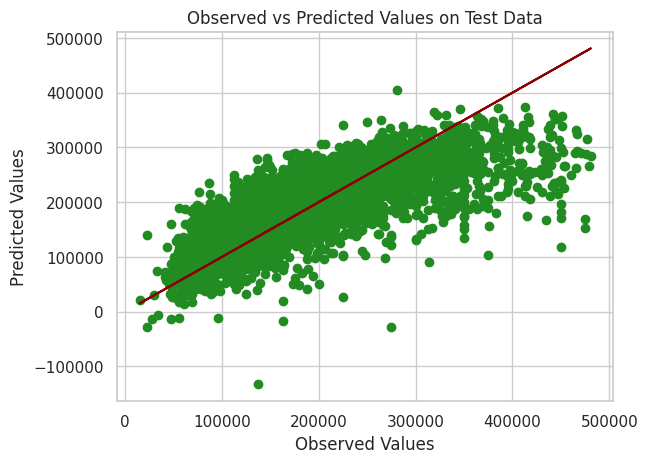

In [93]:
# Scatter plot for observed vs predicted values on test data
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred') # line for perfect prediction (true values)
plt.show()

##Assumption 2:Random Sample

In [34]:
# Calculate the mean of the residuals
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}") #rounds to two decimal places


The mean of the residuals is 0.0


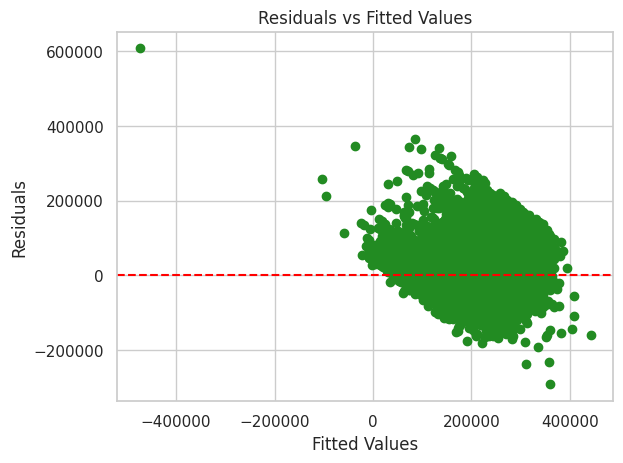

In [35]:
# Plotting the residuals
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.show()


##Assumption 3:Exogeneity (We have independent variables)

In [36]:
# Calculate the residuals
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor
for column in X_train.columns:
  corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
  print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: -0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: 0.0
Correlation between residuals and total_rooms: -0.0
Correlation between residuals and population: -0.0
Correlation between residuals and households: -0.0
Correlation between residuals and median_income: -0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: -0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: 0.0


##Assumption 4: Homoskedasticty

In [97]:
#skipped
#Pytorch - a mechine learning library
#